<a href="https://colab.research.google.com/github/daaaanish17/sales_data_analysis/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

Merging all months csv files

In [ ]:
li = []

for file in glob.glob('filess/*'):
    li.append(pd.read_csv(file))

f = pd.concat(li)  

In [ ]:
f.shape

(186850, 6)

Creating a new .csv file

In [ ]:
f.to_csv('new_file.csv', index=False)

In [76]:
df = pd.read_csv('new_file.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [ ]:
df.shape

(186850, 6)

DATA PREPROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


DATA CLEANING

In [77]:
# dealing with missing values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [78]:
# dropping nan rows
df.dropna(inplace=True)

dropping duplicated rows

In [79]:
df = df.drop_duplicates()

Resetting index

In [80]:
df.reset_index(inplace=True, drop=True)

EDA (EXPLORATORY DATA ANALYSIS)

In [81]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

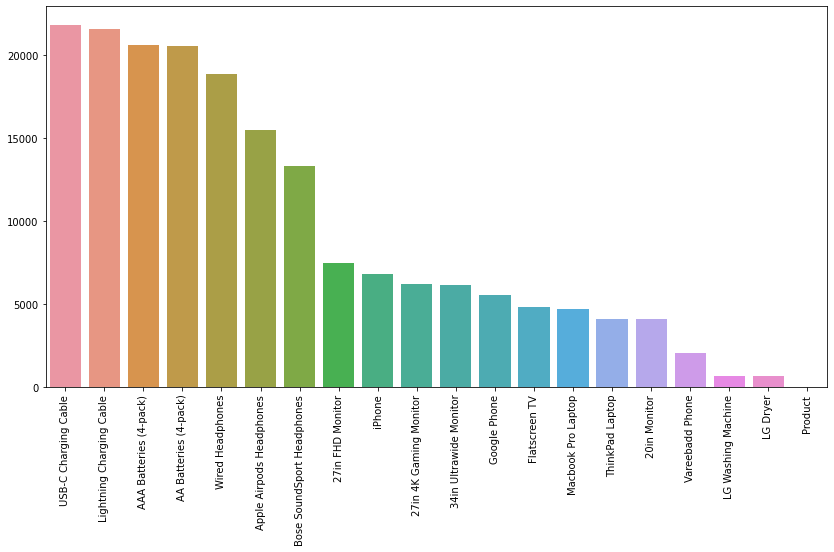

In [82]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['Product'].value_counts().index, y=df['Product'].value_counts().values, data=df)

plt.xticks(rotation=90)

plt.show()

1) What was the best month for sales? How much was earned that month

In [83]:
df[df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
432,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [84]:
df.drop([432], axis=0, inplace=True)

In [85]:
df[df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [86]:
# changing data type of columns

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [87]:
print(df['Quantity Ordered'].dtype)
print(df['Price Each'].dtype)

int64
float64


In [88]:
# adding month column

df['month'] = df['Order Date'].str[:2]

In [89]:
# now changing month column type

df['month'] = pd.to_numeric(df['month'])

In [90]:
# creating sales col

df['sales'] = df['Quantity Ordered'] * df['Price Each']

In [91]:
# grouping

grp = df.groupby(['month']).sum()['sales']
# print(grp)

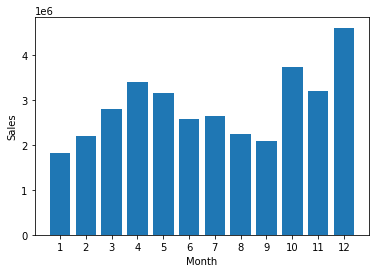

In [92]:
# visual representation

months = list(range(1, 13))

plt.bar(months, grp)
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month')

plt.show()

BEST MONTH: 12

SALES: 4613443.34 

2) What city sold the most product

In [93]:
# adding city column
df['city'] = df['Purchase Address'].apply(lambda x: x.split(', ')[1] + ' (' + x.split(', ')[2].split(' ')[0] + ')')


# grouping wrt to city

cities = df['city'].unique()
sorted_cities = sorted(cities)
grp2 = df.groupby(['city']).sum()['sales']
print(grp2)

city
Atlanta (GA)          2794199.07
Austin (TX)           1818044.33
Boston (MA)           3658627.65
Dallas (TX)           2765373.96
Los Angeles (CA)      5448304.28
New York City (NY)    4661867.14
Portland (ME)          449321.38
Portland (OR)         1870010.56
San Francisco (CA)    8254743.55
Seattle (WA)          2745046.02
Name: sales, dtype: float64


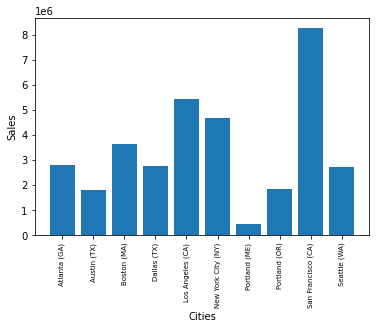

In [94]:
# visual representation

plt.bar(sorted_cities, grp2)
plt.xticks(sorted_cities, rotation='vertical', size=7)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.show()

CITY: San Francisco (CA)

SALES: 8262203.91


3) Which are the most selling products?

In [95]:
# product names
product = df['Product'].unique()
# sorting those names
sorted_product = sorted(product)

# no. of products
# print(len(sorted_product))

# grouping wrt to product names
grp3 = df.groupby(['Product']).sum()['sales']
# print(grp3)

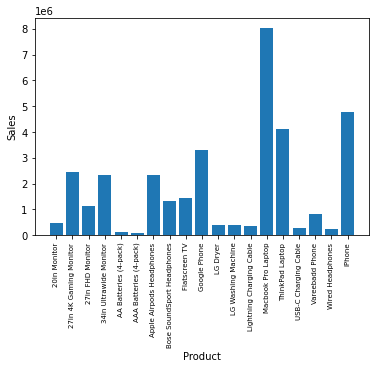

In [96]:
# visual representation

plt.bar(sorted_product, grp3)
plt.xticks(sorted_product, rotation='vertical', size=7)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.show()

4) What time should we display advertisements to maximize likelihood of customer's buying product?

In [97]:
df['time'] = df['Order Date'].apply(lambda x: x.split(' ')[1])
df['hour'] = df['time'].apply(lambda x: x.split(':')[0])
df['mins'] = df['time'].apply(lambda x: x.split(':')[1])


hour = sorted(df['hour'].unique())

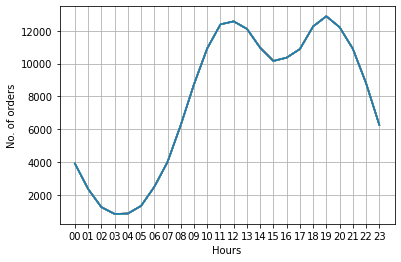

In [98]:
# visual representation

plt.plot(hour, df.groupby(['hour']).count())
plt.grid()
plt.ylabel('No. of orders')
plt.xlabel('Hours')
plt.show()